#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Rating Data

In [2]:
df = pd.read_csv('Data/archive/rating.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16


# RATINGS ANALYSIS

####  Rating Statistics

In [3]:
# Avoid scientific digital format
pd.options.display.float_format = '{:.2f}'.format

# Display rating statistics
print(df['rating'].describe())

count   20000263.00
mean           3.53
std            1.05
min            0.50
25%            3.00
50%            3.50
75%            4.00
max            5.00
Name: rating, dtype: float64


#### Distribution of Ratings

In [4]:
df_rating = pd.DataFrame()
df_rating['counts'] = df['rating'].value_counts().sort_index(ascending=False)
df_rating['percentage'] = round(df_rating['counts']/len(df)*100)
df_rating

,counts,percentage
rating,,
5.00,2898660,14.00
4.50,1534824,8.00
4.00,5561926,28.00
3.50,2200156,11.00
3.00,4291193,21.00
2.50,883398,4.00
2.00,1430997,7.00
1.50,279252,1.00
1.00,680732,3.00


#### Visualization of Distribution

<Axes: xlabel='rating', ylabel='count'>

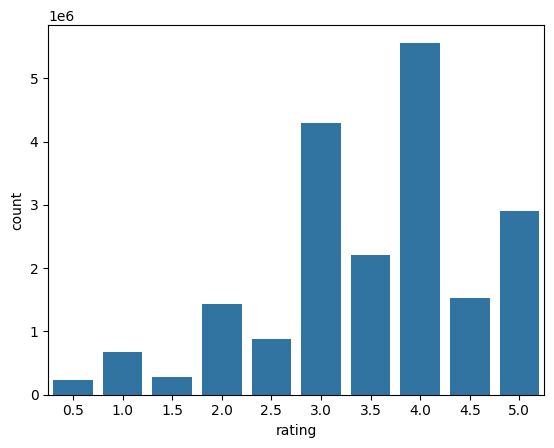

In [5]:
sns.countplot(x='rating',data=df)

# USERS ANALYSIS

#### Number of unique Users = 138K

In [6]:
df['userId'].nunique()

138493

#### Counting the number of rating per user

In [7]:
df['ratings_per_user'] = df.groupby('userId')['userId'].transform('count')
df.head(2)

,userId,movieId,rating,timestamp,ratings_per_user
0,1,2,3.50,2005-04-02 23:53:47,175
1,1,29,3.50,2005-04-02 23:31:16,175


#### Number of occurence of quantity of ratings par user
We notice that the top of this list is filled with small quantities like from 20's to 50's

In [8]:
print(df['ratings_per_user'].value_counts()[:20])

ratings_per_user
20     89700
100    72700
21     65184
50     62550
22     62304
23     60743
25     59975
101    59691
30     58020
24     56760
28     56448
26     56264
40     55760
29     55738
35     55265
32     55264
55     55110
51     55029
33     54813
31     54560
Name: count, dtype: int64


#### Ratings per user Statistics

In [9]:
print(df['ratings_per_user'].describe())

count   20000263.00
mean         511.57
std          663.36
min           20.00
25%          123.00
50%          296.00
75%          644.00
max         9254.00
Name: ratings_per_user, dtype: float64


#### Calculating average rating per User

In [10]:
df['avg_user_rating'] = df.groupby('userId')['rating'].transform('mean')
df.head(2)

,userId,movieId,rating,timestamp,ratings_per_user,avg_user_rating
0,1,2,3.50,2005-04-02 23:53:47,175,3.74
1,1,29,3.50,2005-04-02 23:31:16,175,3.74


#### Showing a scatterplot of the number of ratings per user for each individual average user rating

<Axes: xlabel='avg_user_rating', ylabel='ratings_per_user'>

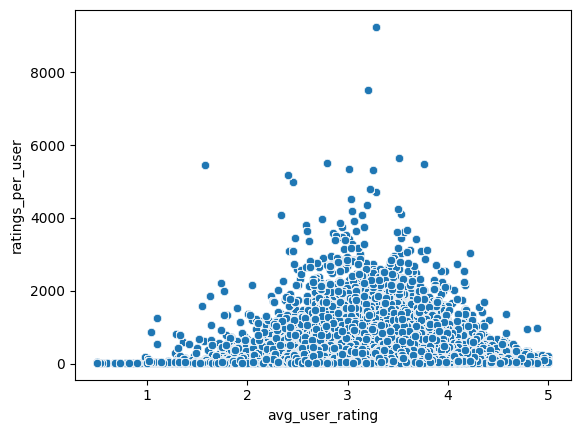

In [11]:
sns.scatterplot(x='avg_user_rating', y='ratings_per_user', data=df)

In this scatterplot we notice that the more a user is engaged in rating, the closest he/she gets to the average rating (3.52). We will clean the DataFrame by cutting the left and right queue.

#### Top and Bottom active users
We notice a very diverse activity going from 20 ratings for the bottom user to 9254 ratings for the top user.

In [12]:
print(df['userId'].value_counts(ascending=False))

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: count, Length: 138493, dtype: int64


#### Showing the frequency of the number of rating per user

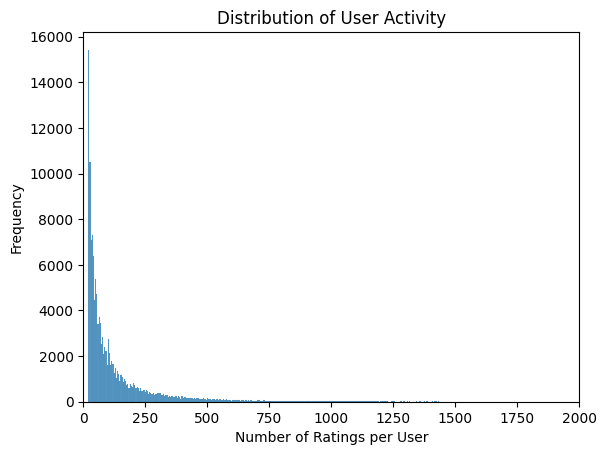

In [13]:
# Count the number of occurrences of each userId
user_counts = df['userId'].value_counts()

# Creating a DataFrame with these occurrences
df_plot = pd.DataFrame({'userId': user_counts.index, 'counts': user_counts.values})

# Show the distribution of these occurrences
sns.histplot(data=df_plot, x='counts')

# Limit the x axis to 2000 ratings
plt.xlim(0, 2000) 

# Add titles et labels
plt.title('Distribution of User Activity')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.show()

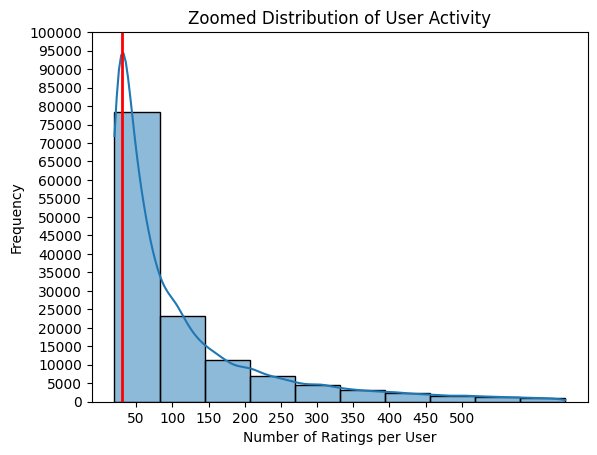

In [14]:
df_plot_filtered = df_plot[df_plot['counts'] < 644]
# Création du histogramme
sns.histplot(data=df_plot_filtered, x='counts', bins=10, kde=True)
# Ajouter une barre horizontale rouge à ordonnée 5000
plt.axvline(x=30, color='red', linestyle='-', linewidth=2)
# Définir les graduations sur l'axe des x
plt.xticks(ticks=range(50, 501, 50))
plt.yticks(ticks=range(0, 100001,5000))

plt.title('Zoomed Distribution of User Activity')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
# Afficher le graphique
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

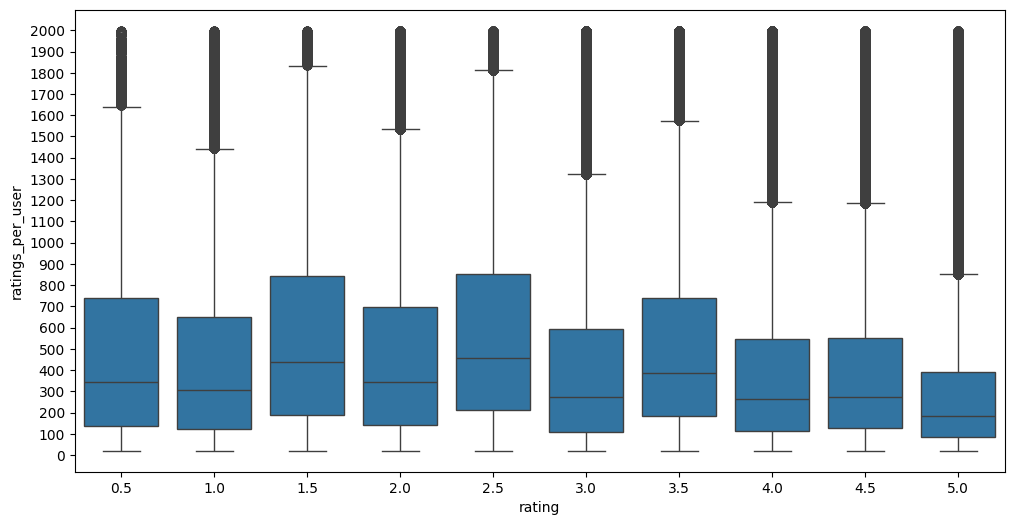

In [15]:
df_filtered = df[df['ratings_per_user'] < 2000]
plt.figure(figsize=(12,6))
sns.boxplot(x='rating',y='ratings_per_user',data=df_filtered)
plt.yticks(ticks=range(0, 2001,100))
plt.show

In [16]:
# Normalisation des valeurs de 'numVotes' pour obtenir un taux de popularité entre 0 et 1
df['user_engagement_rate'] = (df['ratings_per_user'] - df['ratings_per_user'].min()) / (df['ratings_per_user'].max() - df['ratings_per_user'].min())
df.head(2)

,userId,movieId,rating,timestamp,ratings_per_user,avg_user_rating,user_engagement_rate
0,1,2,3.50,2005-04-02 23:53:47,175,3.74,0.02
1,1,29,3.50,2005-04-02 23:31:16,175,3.74,0.02


# MOVIES ANALYSIS

#### Number of unique Movies = 26K

In [17]:
df['movieId'].nunique()

26744

#### Counting Movie rating occurence

In [18]:
df['ratings_per_movie'] = df.groupby('movieId')['movieId'].transform('count')
df.head()

,userId,movieId,rating,timestamp,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie
0,1,2,3.50,2005-04-02 23:53:47,175,3.74,0.02,22243
1,1,29,3.50,2005-04-02 23:31:16,175,3.74,0.02,8520
2,1,32,3.50,2005-04-02 23:33:39,175,3.74,0.02,44980
3,1,47,3.50,2005-04-02 23:32:07,175,3.74,0.02,43249
4,1,50,3.50,2005-04-02 23:29:40,175,3.74,0.02,47006


In [19]:
print(df['ratings_per_movie'].describe())

count   20000263.00
mean       13480.38
std        14112.08
min            1.00
25%         2963.00
50%         8505.00
75%        19674.00
max        67310.00
Name: ratings_per_movie, dtype: float64


#### Calculating average rating per Movie

In [20]:
df['avg_movie_rating'] = df.groupby('movieId')['rating'].transform('mean')
df.head()

,userId,movieId,rating,timestamp,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating
0,1,2,3.50,2005-04-02 23:53:47,175,3.74,0.02,22243,3.21
1,1,29,3.50,2005-04-02 23:31:16,175,3.74,0.02,8520,3.95
2,1,32,3.50,2005-04-02 23:33:39,175,3.74,0.02,44980,3.90
3,1,47,3.50,2005-04-02 23:32:07,175,3.74,0.02,43249,4.05
4,1,50,3.50,2005-04-02 23:29:40,175,3.74,0.02,47006,4.33


#### Showing a scatterplot of the number of ratings per movie for each individual average movie rating

<Axes: xlabel='avg_movie_rating', ylabel='ratings_per_movie'>

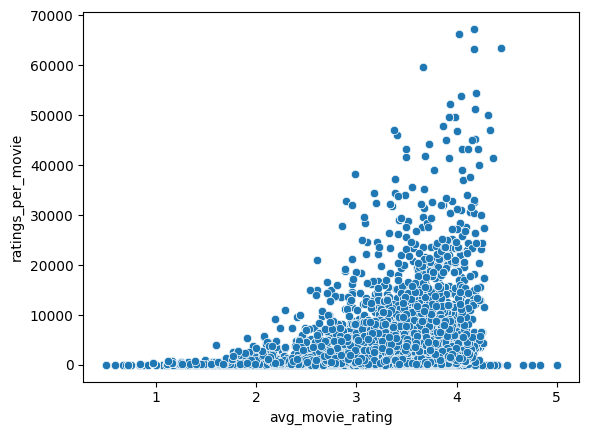

In [21]:
sns.scatterplot(x='avg_movie_rating', y='ratings_per_movie', data=df)

#### Top and Bottom rated movies
We notice a very diverse interest for movies going from 1 rating for the bottom movies to 67310 ratings for the top movie.

In [22]:
print(df['movieId'].value_counts(ascending=False))

movieId
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
125545        1
78873         1
112907        1
112909        1
110510        1
Name: count, Length: 26744, dtype: int64


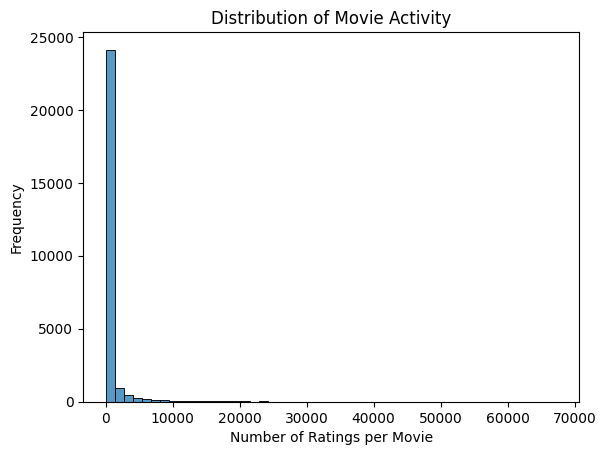

In [23]:
# Étape 1 : Compter le nombre d'occurrences de chaque userId
movie_counts = df['movieId'].value_counts()

# Étape 2 : Créer un DataFrame avec ces occurrences
df_plot_movie = pd.DataFrame({'movieId': movie_counts.index, 'counts': movie_counts.values})

# Étape 3 : Tracer la distribution des occurrences
sns.histplot(data=df_plot_movie, x='counts', bins= 50)

# Option 1: Limiter l'axe des x
#plt.xlim(0, 2000)  # Ajustez les limites en fonction de ce qui vous semble pertinent

# Optionnel : ajouter des titres et labels
plt.title('Distribution of Movie Activity')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')
plt.show()

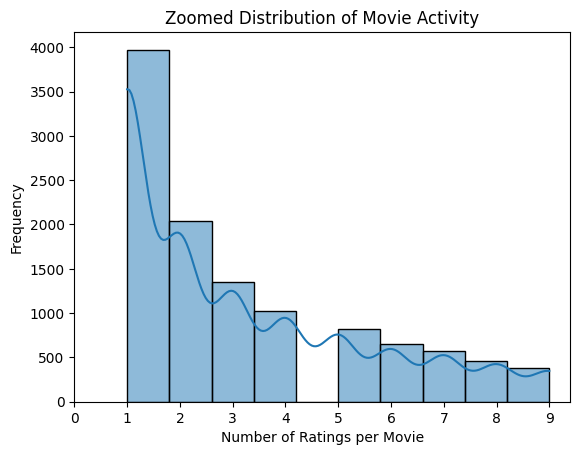

In [24]:
df_plot_filtered_movie = df_plot_movie[df_plot_movie['counts'] < 10]
# Creating a barplot
sns.histplot(data=df_plot_filtered_movie, x='counts', bins=10, kde=True)

# Create les graduations on x axis
plt.xticks(ticks=range(0, 10, 1))


plt.title('Zoomed Distribution of Movie Activity')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Frequency')
# Show the plot
plt.show()

#### Transforming timestamp into a rating youth rate

This means the youngest rating will have the highest score = 1, and the oldest rating will have the lowest score = 0

In [25]:
# Convert 'timestamp'columns into datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate age in years
current_date = pd.Timestamp.now()
df['age'] = round((current_date - df['timestamp']).dt.days / 365.25, 0)

# Creating the rating youth rate
df['rating_youth_rate'] = 1 - (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

# Drop 'age' and 'timestamp' column 
df = df.drop(columns=['age', 'timestamp'])
df.head(3)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating,rating_youth_rate
0,1,2,3.50,175,3.74,0.02,22243,3.21,0.52
1,1,29,3.50,175,3.74,0.02,8520,3.95,0.52
2,1,32,3.50,175,3.74,0.02,44980,3.90,0.52


In [26]:
# Normalisation des valeurs de 'numVotes' pour obtenir un taux de popularité entre 0 et 1
df['movie_popularity_rate'] = (df['ratings_per_movie'] - df['ratings_per_movie'].min()) / (df['ratings_per_movie'].max() - df['ratings_per_movie'].min())
df.head(2)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating,rating_youth_rate,movie_popularity_rate
0,1,2,3.50,175,3.74,0.02,22243,3.21,0.52,0.33
1,1,29,3.50,175,3.74,0.02,8520,3.95,0.52,0.13


#### Casting very light types 

In [27]:
'''df['rating'] = df['rating'].astype('float16')
df['ratings_per_user'] = df['ratings_per_user'].astype('int16')
df['avg_user_rating'] = df['avg_user_rating'].astype('float16')
df['ratings_per_movie'] = df['ratings_per_movie'].astype('int32')
df['avg_movie_rating'] = df['avg_movie_rating'].astype('float16')
df['rating_youth_rate'] = df['rating_youth_rate'].astype('float16')
df['user_engagement_rate'] = df['user_engagement_rate'].astype('float16')
df['movie_popularity_rate'] = df['movie_popularity_rate'].astype('float16')'''

"df['rating'] = df['rating'].astype('float16')\ndf['ratings_per_user'] = df['ratings_per_user'].astype('int16')\ndf['avg_user_rating'] = df['avg_user_rating'].astype('float16')\ndf['ratings_per_movie'] = df['ratings_per_movie'].astype('int32')\ndf['avg_movie_rating'] = df['avg_movie_rating'].astype('float16')\ndf['rating_youth_rate'] = df['rating_youth_rate'].astype('float16')\ndf['user_engagement_rate'] = df['user_engagement_rate'].astype('float16')\ndf['movie_popularity_rate'] = df['movie_popularity_rate'].astype('float16')"

#### Creating Filtered Dataframes

In [28]:
# Filtering the top active users with more than 644 ratings per user, they provide 25% of all ratings
df_top_active_users = df[df['ratings_per_user'] > 644]

In [29]:
print("nb of ratings :",len(df_top_active_users))
print("nb of users :",df_top_active_users['userId'].nunique())

nb of ratings : 4993925
nb of users : 4673


In [30]:
df_top_active_users[['ratings_per_user', 'avg_user_rating']].describe()

,ratings_per_user,avg_user_rating
count,4993925.00,4993925.00
mean,1336.00,3.30
std,877.83,0.42
min,645.00,1.03
25%,812.00,3.05
50%,1067.00,3.33
75%,1498.00,3.58
max,9254.00,4.89


In [31]:
# Filtering the less active users with less than 123 ratings per user, they provide 25% of all ratings
df_bottom_active_users = df[df['ratings_per_user'] < 123]

In [32]:
print("nb of ratings :",len(df_bottom_active_users))
print("nb of users :",df_bottom_active_users['userId'].nunique())

nb of ratings : 4999034
nb of users : 95396


In [33]:
df_bottom_active_users[['ratings_per_user', 'avg_user_rating']].describe()

,ratings_per_user,avg_user_rating
count,4999034.00,4999034.00
mean,67.62,3.67
std,30.05,0.43
min,20.00,0.50
25%,41.00,3.41
50%,66.00,3.69
75%,94.00,3.96
max,122.00,5.00


In [34]:
# Filtering the middle active users with more than 123 and less that 644 ratings per user, they provide 50% of all ratings
df_middle_active_users = df[(df['ratings_per_user'] > 123) & (df['ratings_per_user'] < 644)]

In [35]:
print("nb of ratings :",len(df_middle_active_users))
print("nb of users :",df_middle_active_users['userId'].nunique())

nb of ratings : 9962336
nb of users : 38105


In [36]:
df_middle_active_users[['ratings_per_user', 'avg_user_rating']].describe()

,ratings_per_user,avg_user_rating
count,9962336.00,9962336.00
mean,322.46,3.56
std,143.94,0.41
min,124.00,0.98
25%,199.00,3.32
50%,297.00,3.59
75%,431.00,3.84
max,643.00,5.00


In [37]:
df_middle_active_users.head(3)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating,rating_youth_rate,movie_popularity_rate
0,1,2,3.50,175,3.74,0.02,22243,3.21,0.52,0.33
1,1,29,3.50,175,3.74,0.02,8520,3.95,0.52,0.13
2,1,32,3.50,175,3.74,0.02,44980,3.90,0.52,0.67


In [38]:
df_middle_active_users.shape

(9962336, 10)

In [39]:
df.head(3)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating,rating_youth_rate,movie_popularity_rate
0,1,2,3.50,175,3.74,0.02,22243,3.21,0.52,0.33
1,1,29,3.50,175,3.74,0.02,8520,3.95,0.52,0.13
2,1,32,3.50,175,3.74,0.02,44980,3.90,0.52,0.67


In [40]:
df.shape

(20000263, 10)

# INTRODUCING MOVIE GENRES

In [41]:
df_movie = pd.read_csv('Data/archive/movie.csv')

In [42]:
df_movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


##### Splitting genres and Extracting title and year data for a easier use later on

In [43]:
# Utiliser str.extract pour séparer le titre et l'année
df_movie[['title', 'year']] = df_movie['title'].str.extract(r'^(.*)\s\((\d{4})\)$')

##### Splitting genres and Extracting title and year data for a easier use later on
# One-hot encoding des genres
df_genres_encoded = df_movie['genres'].str.get_dummies(sep='|')

# Concatenation avec le DataFrame original
df_movie = pd.concat([df_movie, df_genres_encoded], axis=1)
df_movie = df_movie.drop(['genres'], axis=1)
df_movie.head(3)

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


##### Dropping a few NaN in titles, and transforming date in age and transforming age in youth_rate for movies

In [44]:
# Drop les lignes sans titles ni years (55 en tout)
df_movie = df_movie.dropna(subset=['title'])

# Convertir la colonne 'year' en entier
df_movie['year'] = df_movie['year'].astype(int)

# Creation de la colonne age_movie
df_movie['age'] = 2024 - df_movie['year']

# Normaliser l'âge pour obtenir le taux de jeunesse (0 à 1)
# Ici, l'âge le plus vieux devient 0 et l'âge le plus jeune devient 1
df_movie['movie_youth_rate'] = 1 - (df_movie['age'] - df_movie['age'].min()) / (df_movie['age'].max() - df_movie['age'].min())

df_movie['movie_youth_rate'] = df_movie['movie_youth_rate'].astype('float32')

# Droper la colonne 'age'
df_movie = df_movie.drop(columns=['age', 'year', '(no genres listed)'], axis=1)

df_movie.head(5)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_youth_rate
0,1,Toy Story,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
1,2,Jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.84
3,4,Waiting to Exhale,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0.84
4,5,Father of the Bride Part II,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84


In [45]:
df_movie['title'].isna().sum()

0

In [46]:
import re

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation et les symboles
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text
df_movie['title'] = df_movie['title'].apply(clean_text)

In [47]:
print(df_movie.columns)

Index(['movieId', 'title', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'movie_youth_rate'],
      dtype='object')


In [48]:
df_movie.head(3)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_youth_rate
0,1,toy story,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
1,2,jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
2,3,grumpier old men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.84


#### Creating df_combine

In [49]:
df_combined = pd.merge(df, df_movie, on='movieId', how='inner')

df_combined.head(5)

,userId,movieId,rating,ratings_per_user,avg_user_rating,user_engagement_rate,ratings_per_movie,avg_movie_rating,rating_youth_rate,movie_popularity_rate,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_youth_rate
0,1,2,3.50,175,3.74,0.02,22243,3.21,0.52,0.33,...,0,0,0,0,0,0,0,0,0,0.84
1,1,29,3.50,175,3.74,0.02,8520,3.95,0.52,0.13,...,0,0,0,1,0,1,0,0,0,0.84
2,1,32,3.50,175,3.74,0.02,44980,3.90,0.52,0.67,...,0,0,0,1,0,1,1,0,0,0.84
3,1,47,3.50,175,3.74,0.02,43249,4.05,0.52,0.64,...,0,0,0,1,0,0,1,0,0,0.84
4,1,50,3.50,175,3.74,0.02,47006,4.33,0.52,0.70,...,0,0,0,1,0,0,1,0,0,0.84


In [50]:
print(df_combined.columns)

Index(['userId', 'movieId', 'rating', 'ratings_per_user', 'avg_user_rating',
       'user_engagement_rate', 'ratings_per_movie', 'avg_movie_rating',
       'rating_youth_rate', 'movie_popularity_rate', 'title', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'movie_youth_rate'],
      dtype='object')


In [51]:
ordered_columns = ['title','userId', 'movieId', 'rating', 'avg_user_rating',
       'user_engagement_rate', 'avg_movie_rating','movie_youth_rate',
       'movie_popularity_rate', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

df_combined = df_combined[ordered_columns]

df_combined.head(2)

,title,userId,movieId,rating,avg_user_rating,user_engagement_rate,avg_movie_rating,movie_youth_rate,movie_popularity_rate,Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,jumanji,1,2,3.50,3.74,0.02,3.21,0.84,0.33,0,...,0,0,0,0,0,0,0,0,0,0
1,city of lost children the cit des enfants perd...,1,29,3.50,3.74,0.02,3.95,0.84,0.13,0,...,0,0,0,0,1,0,1,0,0,0


In [52]:
df_combined['movieId'].nunique()

26689

#### Creating ratings_plus_rates_df

In [53]:
ratings_plus_rates_df = df_combined.copy()
ordered_columns_for_ratings_plus_rates_df = ['userId', 'movieId', 'rating',
       'user_engagement_rate','movie_youth_rate','movie_popularity_rate']

ratings_plus_rates_df = ratings_plus_rates_df[ordered_columns_for_ratings_plus_rates_df]

ratings_plus_rates_df.head(2)

,userId,movieId,rating,user_engagement_rate,movie_youth_rate,movie_popularity_rate
0,1,2,3.50,0.02,0.84,0.33
1,1,29,3.50,0.02,0.84,0.13


In [54]:
ratings_plus_rates_df.shape

(19999415, 6)

In [55]:
ratings_plus_rates_df['movieId'].nunique()

26689

#### Creating ratings_df

In [56]:
ratings_df = df_combined.copy()
ordered_columns_for_ratings_df = ['userId', 'movieId', 'rating']

ratings_df = ratings_df[ordered_columns_for_ratings_df]

ratings_df.head(2)

,userId,movieId,rating
0,1,2,3.50
1,1,29,3.50


In [57]:
ratings_df.shape

(19999415, 3)

In [58]:
ratings_df['movieId'].nunique()

26689

#### Creating movies_df

In [59]:
movies_df = df_combined.copy()
ordered_columns_for_movies_df = ['movieId', 'avg_movie_rating','title', 'movie_youth_rate', 'movie_popularity_rate','Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

movies_df = movies_df[ordered_columns_for_movies_df]
movies_df = movies_df.drop_duplicates(keep='last')
movies_df.sort_values(by='movieId', ascending=True, inplace=True)
movies_df = movies_df.reset_index(drop=True)

movies_df.head(2)

,movieId,avg_movie_rating,title,movie_youth_rate,movie_popularity_rate,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3.92,toy story,0.84,0.74,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3.21,jumanji,0.84,0.33,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
movies_df.shape

(26689, 24)

In [61]:
sorted(movies_df.movieId.unique()) == sorted(ratings_df.movieId.unique())

True

In [62]:
all_movies_in_ratings = np.isin(ratings_df.movieId.unique(), movies_df.movieId.unique())
all_movies_in_ratings.all()

True

In [63]:
ratings_df.to_csv('Data/Data_LightFm/ratings.csv', index=False)
movies_df.to_csv('Data/Data_LightFm/movies.csv', index=False)